## Problem statement

Predict future sales amount for specific User and Product Code based on last month sales.

## Exploratory analysis

In [3]:
import pandas as pd
import copy
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [4]:
path = '/Users/dangloan/Documents/learning_analytics/project/'
df = pd.read_csv(path + '3_data/black_friday/train.csv')
df_test = pd.read_csv(path + '3_data/black_friday/test.csv')

In [3]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(df,check_correlation = True)
profile.to_file(outputfile="output.html")

In [5]:
from IPython.display import HTML
HTML(filename='/Users/dangloan/Documents/learning_analytics/' \
                 'project/code/project_1/output.html')

Now take a look at test data set to see if distribution is similar to train data

In [103]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(df_test,check_correlation = True)
profile

For some reason, pandas_profiling doesn't show correlation between features. Let's generate correlation heatmap for train and test data sets.

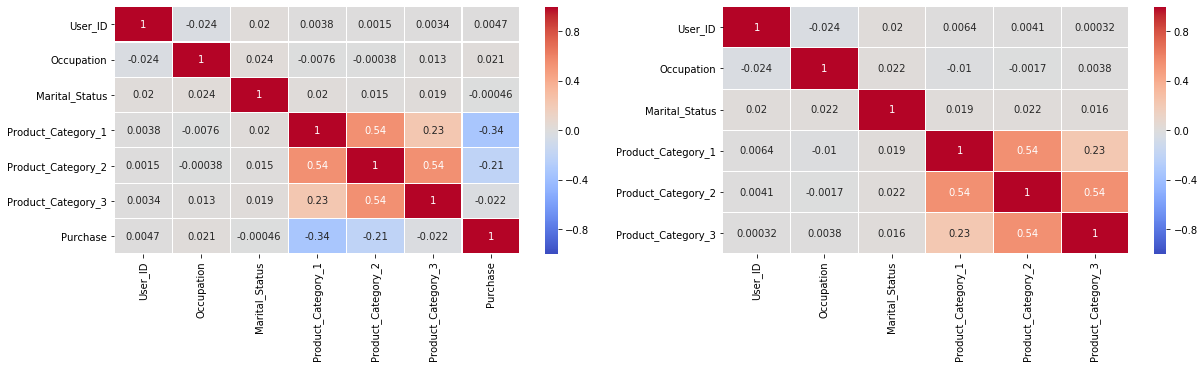

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,10))

fig.add_subplot(221)   #top left
sns.heatmap(df.corr(),
            vmin=-1,
            cmap='coolwarm',
            annot=True,
           linecolor='white',
           linewidths='0.1')

fig.add_subplot(222)   #top right
sns.heatmap(df_test.corr(),
            vmin=-1,
            cmap='coolwarm',
            annot=True,
           linecolor='white',
           linewidths='0.1')

plt.show()

Explore purchase amount by Occupation field. There are some differences in purchase mean between Occupations.

In [56]:
Occ_stats = df.groupby('Occupation')['Purchase'].agg(['count','mean']).reset_index()\
        .sort_values('mean', ascending=False)
Occ_stats.columns = ['Occupation','Occ_count','Occ_mean']

Occupation  count         mean
17          17  40043  9821.478236
12          12  31179  9796.640239
15          15  12165  9778.891163
8            8   1546  9532.592497
14          14  27309  9500.702772
7            7  59133  9425.728223
16          16  25371  9394.464349
5            5  12177  9333.149298
13          13   7728  9306.351061
6            6  20355  9256.535691
4            4  72308  9213.980251
11          11  11586  9213.845848
3            3  17650  9178.593088
18          18   6622  9169.655844
0            0  69638  9124.428588
10          10  12930  8959.355375
1            1  47426  8953.193270
2            2  26588  8952.481683
20          20  33562  8836.494905
19          19   8461  8710.627231
9            9   6291  8637.743761

Text(0.5, 1.0, 'Purchase count and mean by Occupation codes')

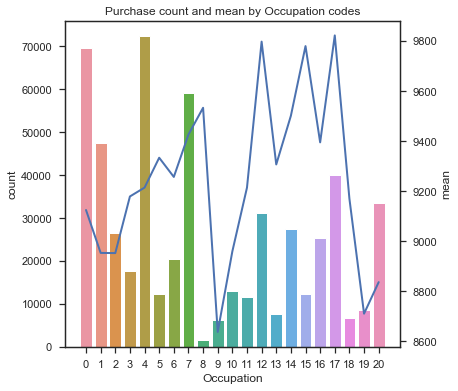

In [159]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# fig = plt.figure(figsize=(10,10))
# fig, ax = plt.subplots(ncols=2)

sns.set(style="ticks", rc={"lines.linewidth": 2})
fig, ax1 = plt.subplots(figsize=(6,6))
ax2 = ax1.twinx()

sns.barplot(x='Occupation', y='count', data=c, ax = ax1)
sns.lineplot(x='Occupation',y='mean', data=c, ax=ax2)
plt.title('Purchase count and mean by Occupation codes')
# plt.show()
# sns.set()

There are some differences in Purchase amount (mean) between different Occupations. I observe Occupation code 8 and 9 have some fluctuations in mean that could due to small number of Purchase (count), the rest are fine.

This gives me an idea about grouping occupations by purchase mean & purchase count. Not sure if it would help increase prediction power. 21 occupations is not a very big number. Therefore, lets just leave this field as is.

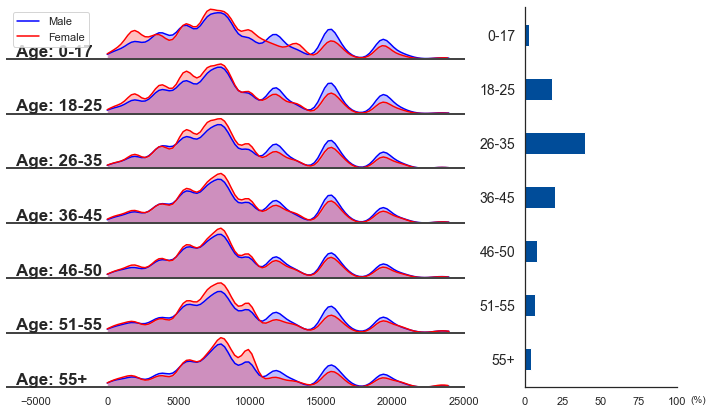

In [37]:
import matplotlib.gridspec as gridspec

freq = ((df.Age.value_counts(normalize = True).reset_index().sort_values(by = 'index').Age)*100).tolist()
number_gp = 7
# freq = the percentage for each age group, and thereâ€™re 7 age groups.


def ax_settings(ax, var_name, x_min, x_max):
    ax.set_xlim(x_min,x_max)
    ax.set_yticks([])
    
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    ax.spines['bottom'].set_edgecolor('#444444')
    ax.spines['bottom'].set_linewidth(2)
    
    ax.text(0.02, 0.05, var_name, fontsize=17, fontweight="bold", transform = ax.transAxes) 
    return None
# Manipulate each axes object in the left. Try to tune some parameters and you'll know how each command works.


fig = plt.figure(figsize=(12,7))
gs = gridspec.GridSpec(nrows=number_gp, 
                       ncols=2, 
                       figure=fig, 
                       width_ratios= [3, 1],
                       height_ratios= [1]*number_gp,
                       wspace=0.2, hspace=0.05
                      )
ax = [None]*(number_gp + 1)
features = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
# Create a figure, partition the figure into 7*2 boxes, set up an ax array to store axes objects, and create a list of age group names.  


for i in range(number_gp):
    ax[i] = fig.add_subplot(gs[i, 0])
    
    ax_settings(ax[i], 'Age: ' + str(features[i]), -7000, 25000)    
    
    sns.kdeplot(data=df[(df.Gender == 'M') & (df.Age == features[i])].Purchase, 
            ax=ax[i], shade=True, color="blue", bw=0.1, legend=False)
    sns.kdeplot(data=df[(df.Gender == 'F') & (df.Age == features[i])].Purchase, 
            ax=ax[i], shade=True, color="red", bw=0.1,  legend=False)
    
    if i < (number_gp - 1): 
        ax[i].set_xticks([])
# this 'for loop' is to create a bunch of axes objects, and link them to GridSpec boxes. Then, we manipulate them with sns.kdeplot() and ax_settings() we just defined.

ax[0].legend(['Male', 'Female'], facecolor='w')
# adding legends on the top axes object  

ax[number_gp] = fig.add_subplot(gs[:, 1])
ax[number_gp].spines['right'].set_visible(False)
ax[number_gp].spines['top'].set_visible(False)
ax[number_gp].barh(features, freq, color='#004c99', height=0.4)
ax[number_gp].set_xlim(0,100)
ax[number_gp].invert_yaxis()
ax[number_gp].text(1.09, -0.04, '(%)', fontsize=10, transform = ax[number_gp].transAxes)   
ax[number_gp].tick_params(axis='y', labelsize = 14)
# manipulate the bar plot on the right. Try to comment out some of the commands to see what they actually do to the bar plot.

plt.show()

/Users/dangloan/miniconda3/envs/py/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  # Remove the CWD from sys.path while we load stuff.


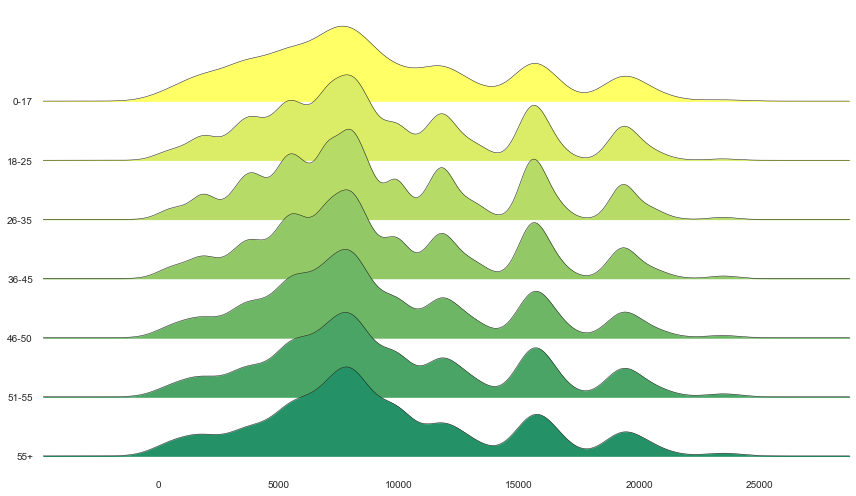

In [35]:
import joypy
from matplotlib import cm
%matplotlib inline

fig, ax1 = plt.subplots(figsize=(12,7))
ax2 = ax1.twinx()

joypy.joyplot(df[df.Gender == 'M'], by='Age', column='Purchase',ax=ax1,
              linewidth=0.5,
             colormap=cm.summer_r)
# joypy.joyplot(df[df.Gender == 'F'], by='Age', column='Purchase',ax=ax2,
#               linewidth=0.5,
#              color='#69b3a2')

ax[0].legend(['Male', 'Female'], facecolor='w')
plt.show()

There is a very slight difference in purchase amount between age groups.

I am going to encode categorical columns using One Hot: Gender, Age, Occupation, City_Category, Stay_In_Current_City_Years, Marital_Status. For high cadinarity columns (Produc Cat) I am searching for a better solution. May need to look at some statistics to group them.
In the correlation report, there are some correlations between Product Cats and Purchase. I'm going to look deeper into Porduct Categories.

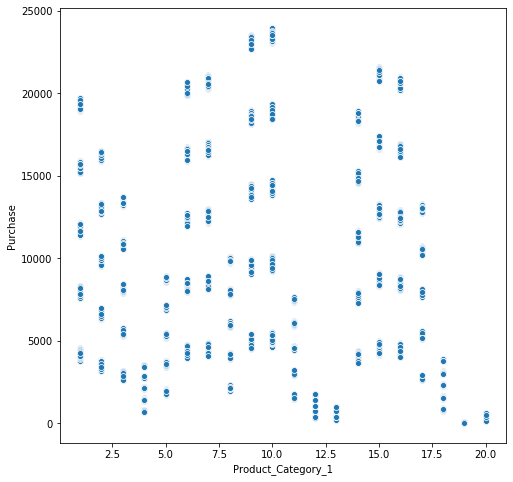

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
sns.scatterplot(df['Product_Category_1'], df['Purchase'])
plt.show()

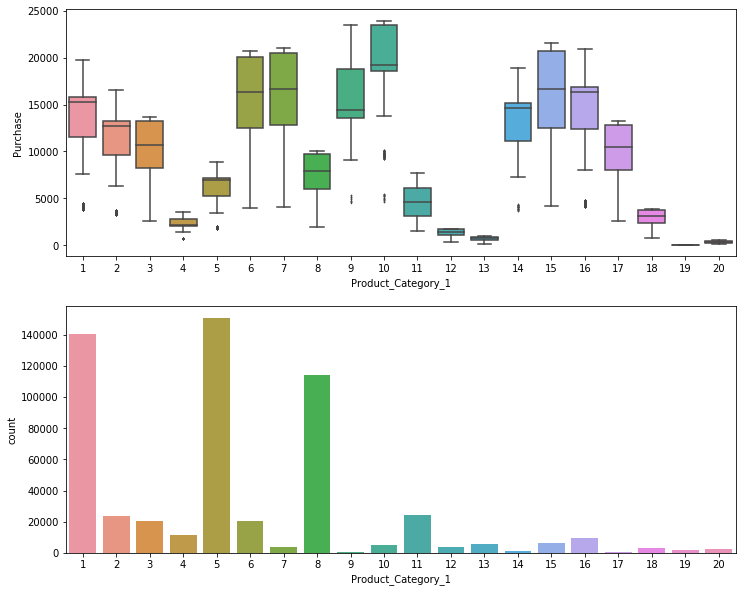

In [11]:
fig = plt.figure(figsize=(12,10))
ax1 = fig.add_subplot(211)
sns.boxplot(x="Product_Category_1", y="Purchase", data=df, fliersize='0.5')

ax2 = fig.add_subplot(212)
sns.barplot(a['Product_Category_1'],a['count'])


Clearly, purchase amount distribution varies ammong Product_Categories_1. Cat 1, 5, 8 with large number of purchase shows clear different purchase amount distribution in which Cat 1 has higher purchase median among the three.

As product dimension shows some interesting pattern, I continue with Product_ID, which is more granular than Product Categories.

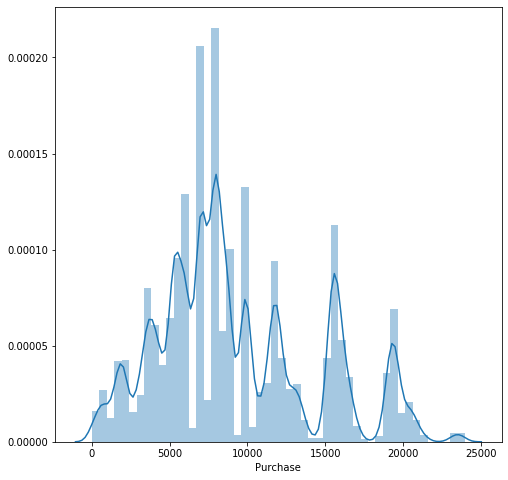

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
sns.distplot(df['Purchase'])
plt.show()

In [82]:
a = df.groupby('Purchase')['Product_ID'].nunique().reset_index()
a.columns =['Purchase_point','count']

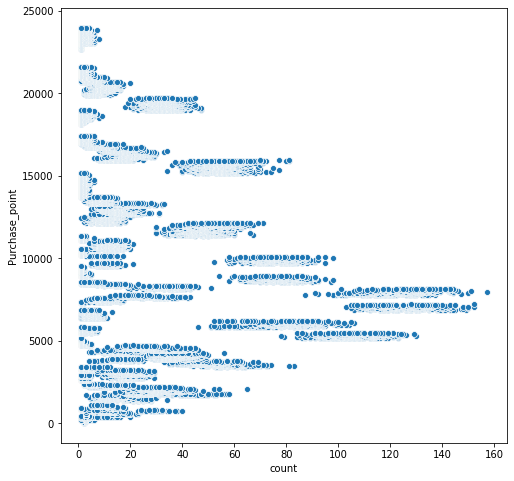

In [85]:
import seaborn as sns
plt.figure(figsize=(8,8))
sns.scatterplot(y='Purchase_point', x='count', data=a)

In [222]:
a = df.groupby('Product_ID')['Purchase'].agg({'count','mean'}).reset_index()
a.columns =['Product_ID','Prod_count','Prod_mean']
# b = a[a['Prod_count'] <= 200]
b= copy.deepcopy(a)

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
c= scaler.fit_transform(b[['Prod_count','Prod_mean']])

kmeans = KMeans(n_clusters=5)  
kmeans.fit(c)

c_df = pd.DataFrame(c)

c_df['cluster'] = kmeans.labels_
c_df = pd.concat([c_df.reset_index(drop=True), 
                  b[['Product_ID']].reset_index(drop=True)],
                 axis=1,ignore_index= True)

c_df.columns = ['Prod_count','Prod_mean','cluster','Product_ID']

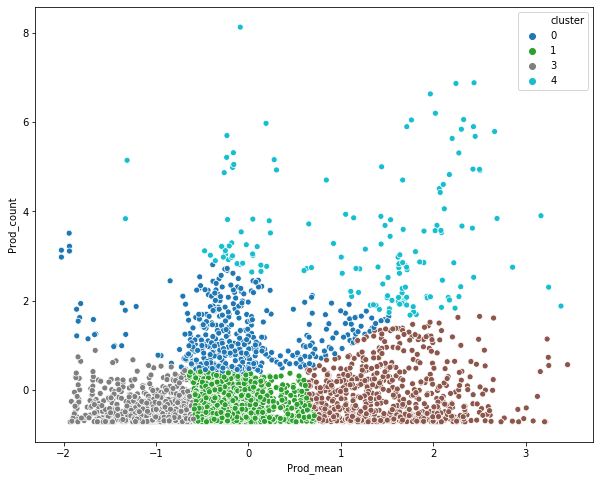

In [223]:
plt.figure(figsize=(10,8))
sns.scatterplot(c_df['Prod_mean'], c_df['Prod_count'], hue=c_df['cluster'],palette='tab10')

#### Cluster Product_ID into groups that have different level of purchase

### More research about Product_ID

In [4]:
# Reducing boundaries to decrease RMSE
import copy
import numpy as np
cutoff_purchase = np.percentile(df['Purchase'], 99.9)  # 99.9 percentile
a = copy.deepcopy(df)
a.ix[a['Purchase'] > cutoff_purchase, 'Purchase'] = cutoff_purchase
b = a.groupby('Product_ID')['Purchase'].agg({'mean','std'}).reset_index()
b.head()

/Users/dangloan/miniconda3/envs/py/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


Product_ID          std          mean
0  P00000142  2305.175261  11143.642361
1  P00000242  3170.603417  10551.851064
2  P00000342  1824.925693   5313.422131
3  P00000442  1664.088125   4795.358696
4  P00000542  1724.458154   5417.530201

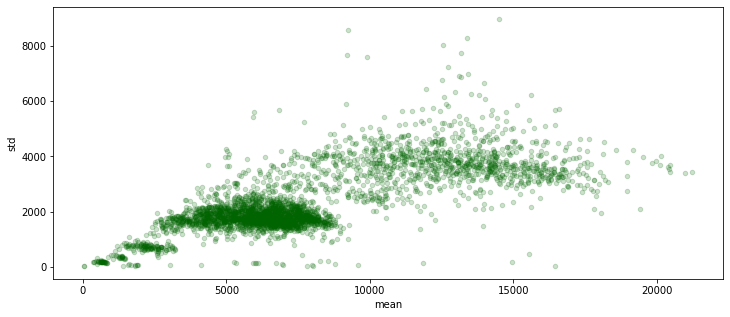

In [8]:
%matplotlib inline
plt.figure(figsize=(12,5))
# sns.scatterplot(b['mean'],b['std'], s=20, alpha=0.3, color='darkgreen')
sns.regplot(b['mean'],b['std'], fit_reg=False, scatter_kws={"color":"darkgreen","alpha":0.2,"s":20} )
# sns.plt.show()


<Figure size 1152x576 with 0 Axes>

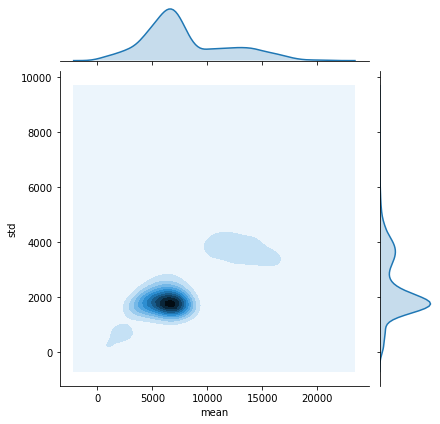

In [5]:
%matplotlib inline
plt.figure(figsize=(16,8))
sns.jointplot(b['mean'],b['std'], kind='kde')
# sns.jointplot(x1, x2, kind="kde", height=7, space=0)

Explore User_ID data

In [18]:
e = df.groupby('Purchase')['User_ID'].nunique().reset_index()
e.columns =['Purchase_point','count']

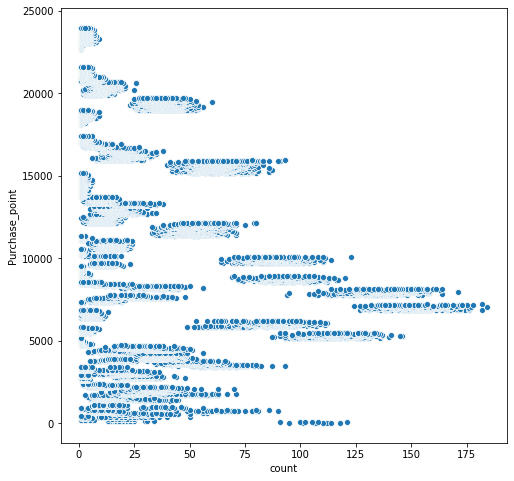

In [19]:
import seaborn as sns
plt.figure(figsize=(8,8))
sns.scatterplot(y='Purchase_point', x='count', data=e)

In [23]:
e = df.groupby('User_ID')['Purchase'].agg({'count','mean'}).reset_index()
e.columns =['User_ID','U_count','U_mean']
# b = a[a['Prod_count'] <= 200]
f= copy.deepcopy(e)

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
g= scaler.fit_transform(f[['U_count','U_mean']])

kmeans = KMeans(n_clusters=6)  
kmeans.fit(g)

g_df = pd.DataFrame(g)

g_df['cluster'] = kmeans.labels_
g_df = pd.concat([g_df.reset_index(drop=True), 
                  f[['User_ID']].reset_index(drop=True)],
                 axis=1,ignore_index= True)

g_df.columns = ['U_count','U_mean','cluster','U_ID']

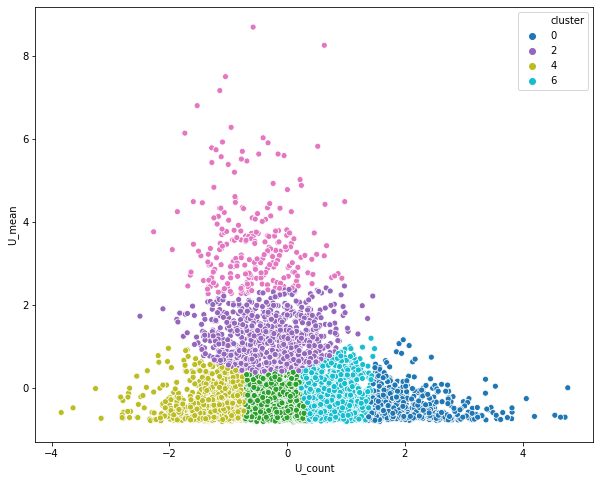

In [76]:
plt.figure(figsize=(10,8))
sns.scatterplot(g_df['U_count'], g_df['U_mean'], hue=g_df['cluster'],palette='tab10')